In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [45]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal length','sepal width','petal length','petal width','target'])
iris.loc[60]

sepal length                  5
sepal width                   2
petal length                3.5
petal width                   1
target          Iris-versicolor
Name: 60, dtype: object

Noramlize data

In [76]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

iris_data = iris.loc[:, features].values
iris_names = iris.loc[:,['target']].values

iris_standard = StandardScaler().fit_transform(iris_data)

#scaled data
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_standard)


PCA 

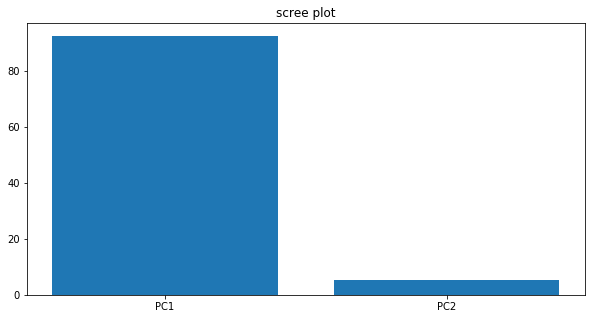

In [47]:
#components
principalComponents = pca.fit_transform(iris_data)

pca_vari = np.round(pca.explained_variance_ratio_ * 100, decimals = 4)
pca_labels = ['PC' + str(x) for x in range(1, len(pca_vari)+1)]

plt.figure(figsize=(10,5))
plt.bar(pca_labels, pca_vari)
plt.title('scree plot')
plt.show()


Text(0.5, 1.0, 'PCA of iris')

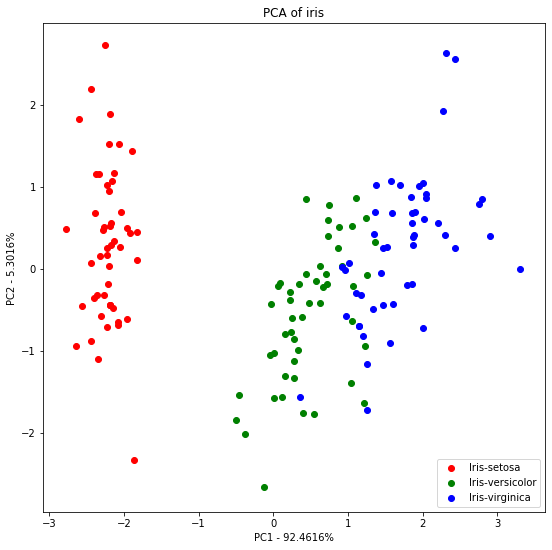

In [48]:
iris_pca = pd.DataFrame(data=iris_pca, columns=pca_labels)
iris_pca['target'] = iris_names

plt.figure(figsize=(9,9))

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
color = ['r','g','b']

for target, color in zip(species,color):
    spec = iris_pca.target == target
    plt.scatter(iris_pca.loc[spec, 'PC1'], iris_pca.loc[spec, 'PC2'], c = color)

plt.legend(species)     
plt.xlabel('PC1 - ' + str(pca_vari[0]) + '%')
plt.ylabel('PC2 - ' + str(pca_vari[1]) + '%')
plt.title('PCA of iris')


**Nearest Neighbor Classification**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

iris_train, iris_test = train_test_split(iris_pca, test_size=0.5)

predictor = KNeighborsClassifier(n_neighbors=5)
predictor.fit(iris_train[['PC1','PC2']], iris_train['target'])

predictions = predictor.predict(iris_test[['PC1','PC2']])

print(accuracy_score(iris_test.target, predictions))

0.9466666666666667


Prediction Function

In [91]:
def predict_flower(sepal_len, sepal_wid, petal_len, petal_wid):
    """Predicts Target from measurements"""

    iris_predict = pd.DataFrame(iris_data.copy())
    iris_predict = np.vstack((iris_predict, data))
    standard = StandardScaler().fit_transform(iris_predict)

    new_val = standard[-1]
    
    x = np.dot(new_val,pca.components_[0])
    y = np.dot(new_val,pca.components_[1])

    prediction = predictor.predict(np.array([x,y]).reshape(1, -1))

    return str(prediction[0])



'Iris-setosa'

In [89]:
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
